<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/proyecto_countries_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de clustering

### Importar librerías

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df_country = pd.read_csv('Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [85]:
df_country.shape

(167, 10)

In [86]:
df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [87]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Manejando valores nulos

In [88]:
# Revisamos si hay valores nulos en el df
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Validando duplicados

In [89]:
# Revisamos si df tiene filas completas con valores duplicados
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Análisis de distribución

In [90]:
# Revisamos si hay outliers estadísticos mediante distribución de datos
int_cols = df_country.select_dtypes(exclude='object').columns #obtenemos solo nombre de variables numéricas
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

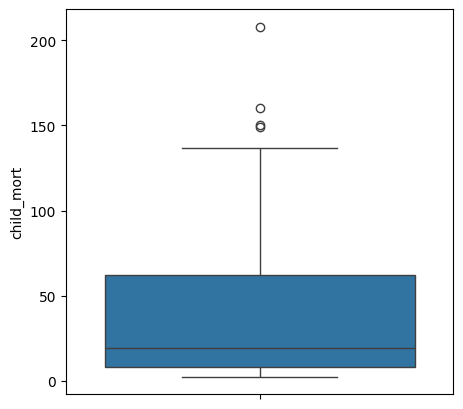

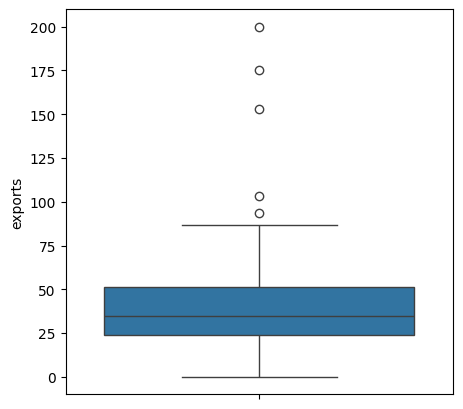

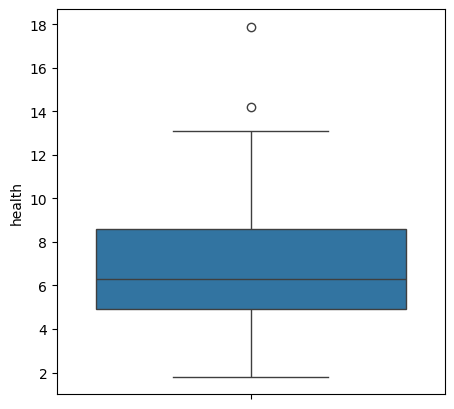

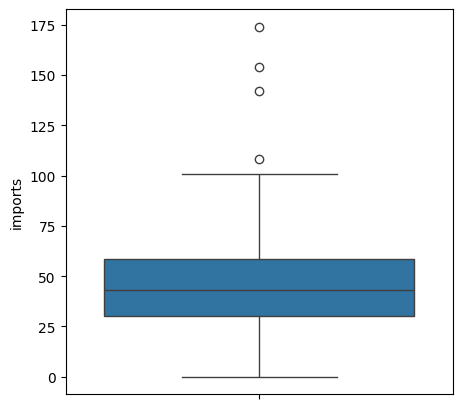

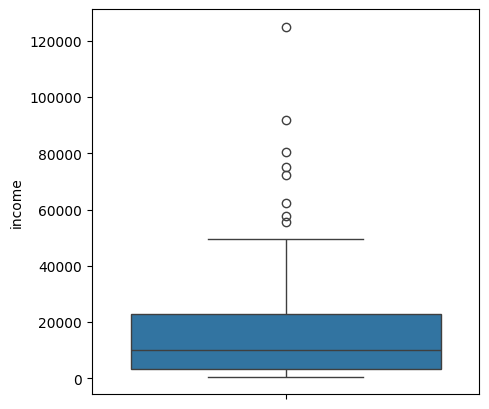

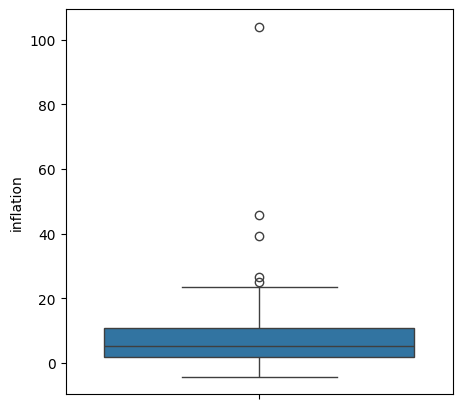

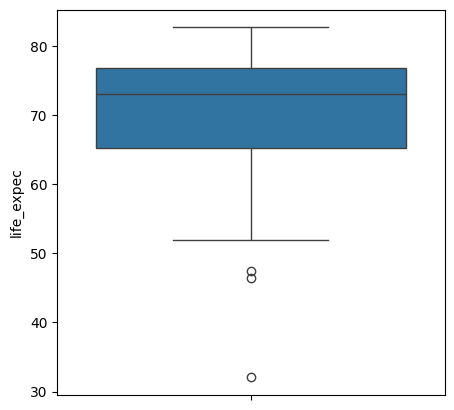

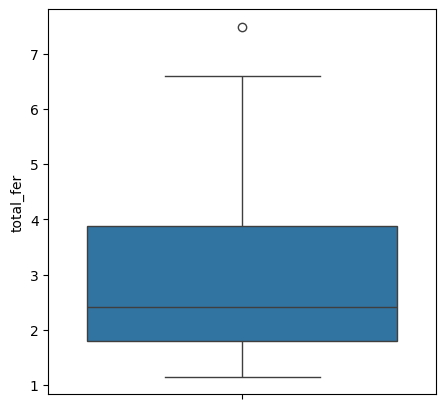

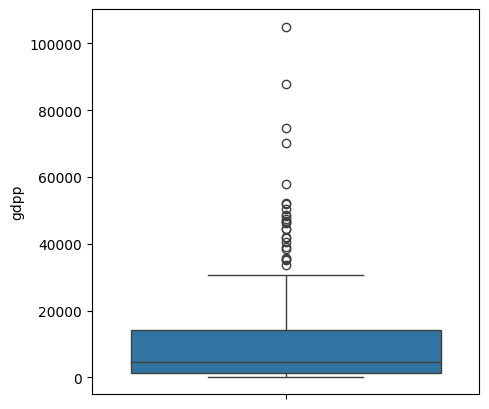

In [91]:
# iteraremos por todas las variables columnas numéricas para graficar cada boxplot
# y así identificar outliers
for _ in int_cols:
  plt.figure(figsize=(5,5))
  sns.boxplot(data=df_country, y=_)
  plt.show()

In [92]:
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

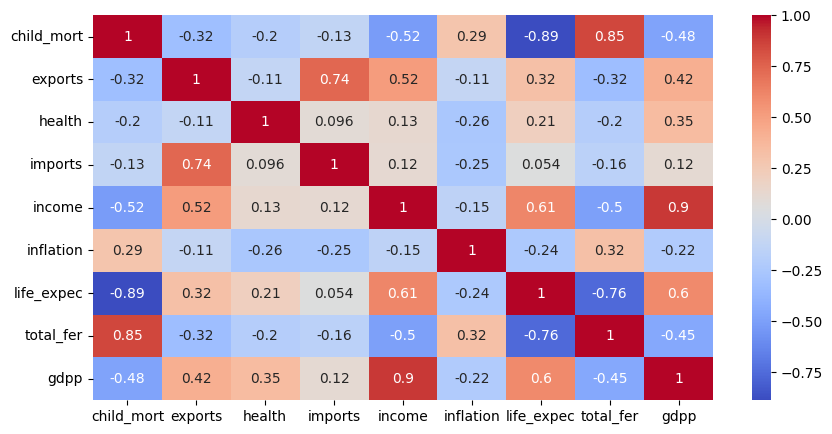

In [93]:
# Graficaremos mediante heatmap correlación entre variables
df_country_var_numeric = df_country.select_dtypes(exclude='object') # guardamos solo variables numéricas
fig = plt.figure(figsize=(10,5))
sns.heatmap(df_country_var_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

### Escalar datos

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # objeto con función de escalamiento
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1)) # escalamos datos de las variables excepto 'country'

In [95]:
df_country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [96]:
# Tomamos df_country_scaled y lo convertimos a dataframe, y le ponemos nombres d ecolumnas
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.drop('country', axis=1).columns)
df_country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [97]:
### Aplicamos PCS (principal components scaled)

In [98]:
from sklearn.decomposition import PCA

In [99]:
pca = PCA() #definimos objeto con función PCA
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [100]:
# Vamos a evaluar el índice o ratio de varianza
# para decidir cuanta reducción de dimensionalidad requiero
# es decir de todas las dimensiones del df cuantas necesito
var = pca.explained_variance_ratio_
print(var)

# Arroja un arreglo con 9 ratios de varianza así, con un índice o componente principal,
# con dos índices o componentes principales, así sucesivamente hasta 9 índices o componentes principales

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


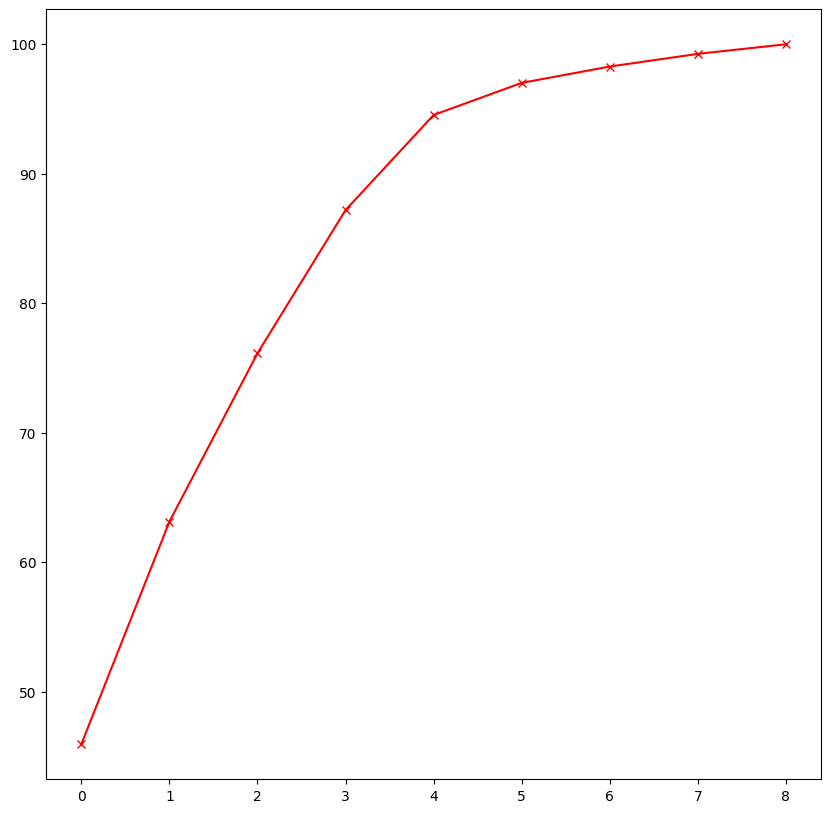

In [101]:
# calculamos la suma de los ratios de la varianza, en porcentaje
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

# En la gráfica las x sobre la línea son las cantidades de componentes princpales de 1 a 9
# y el eje vertical es el porcentaje de ratio de varianza.
# La gráfica arroja que cuando se dejan 4 componentes principales
# se tienen casi el 90% de mis variables,
# con 5 coonmp ppales se tendría aprox. el 95%
# Decidimos 4 componentes principales

In [102]:
# Seleccionando trabajar con 4 componentes principales seguimos
pca_data_standar = pd.DataFrame(pca_data_scaled)  # convertimos a dataframe pca_data_scaled
pca_data_standar.drop([4,5,6,7,8], axis=1, inplace=True) # borramos las columnas dimensiones que no necesito de pca_data_scaled

In [103]:
pca_data_standar

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


### Importamos librerías para clustering

In [104]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### K-means

### PCA
Aplicaremos KMeans sobre el dataset al que se le hizo reducción de dimensionalidad pc_data_scaled

In [105]:
# Como no sabemos el K, tenemos que iterar sobre distintos K, para encontrar el apropidado
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
  km = KMeans(n_clusters= _, n_init=10)  # aplicamos KMeans sobre lo que estamos iterando
  y = km.fit_predict(pca_data_standar)  # hacemos predicción
  Sum_of_squared_distances.append(km.inertia_) # el resultados de la predicción y, lo añadimos a sum_of_square para la gráfica del codo
  silhouette_scores.append(silhouette_score(pca_data_standar, y)) # obtenemos los coeficientes de silueta

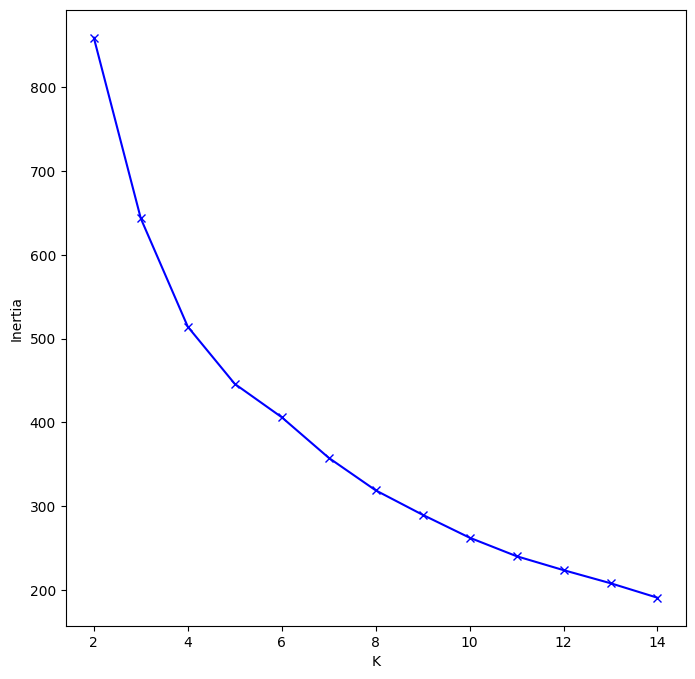

In [106]:
# Graficamos
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

# La gráfica arroja que el K óptimo del codo está entre 4 y 5

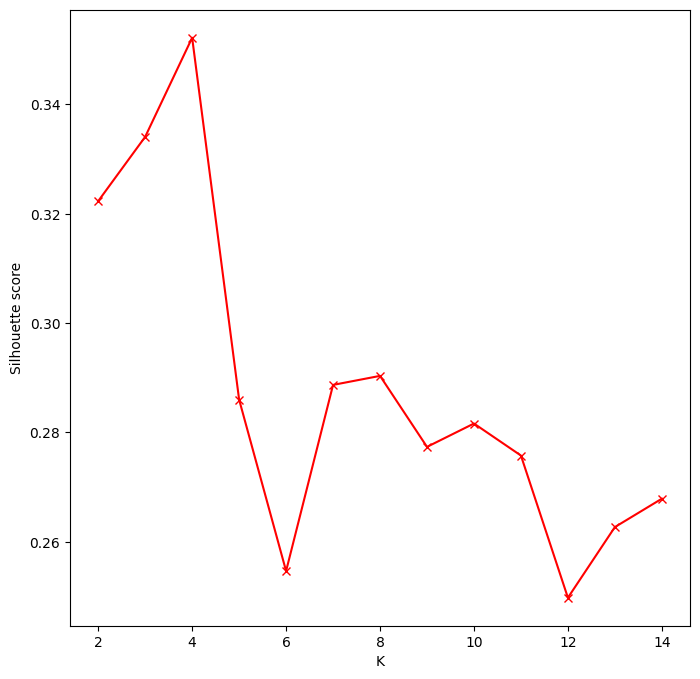

In [107]:
# confirmamos si K óptima está entre 4 y 5 con el coeficiente de silueta
plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

# La gráfica arroja que K =  4  es el K óptimo

In [108]:
km = KMeans(n_clusters= 4, n_init=10)  # aplicamos KMeans
y = km.fit_predict(pca_data_standar)  # hacemos predicción
print('Índice de silhouette = ', silhouette_score(pca_data_standar, y)) #imprimimos pca data standar contra predicciones y
df_country['k_means_pca'] = y

Índice de silhouette =  0.3522170843293593


### sin PCA Calcularemos el Índice de silhouette pero

In [109]:
# Como no sabemos el K, tenemos que iterar sobre distintos K, para encontrar el apropidado
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
  km = KMeans(n_clusters= _, n_init=10)  # aplicamos KMeans sobre lo que estamos iterando
  y = km.fit_predict(df_country_scaled)  # hacemos predicción
  Sum_of_squared_distances.append(km.inertia_) # el resultados de la predicción y, lo añadimos a sum_of_square para la gráfica del codo
  silhouette_scores.append(silhouette_score(df_country_scaled, y)) # obtenemos los coeficientes de silueta

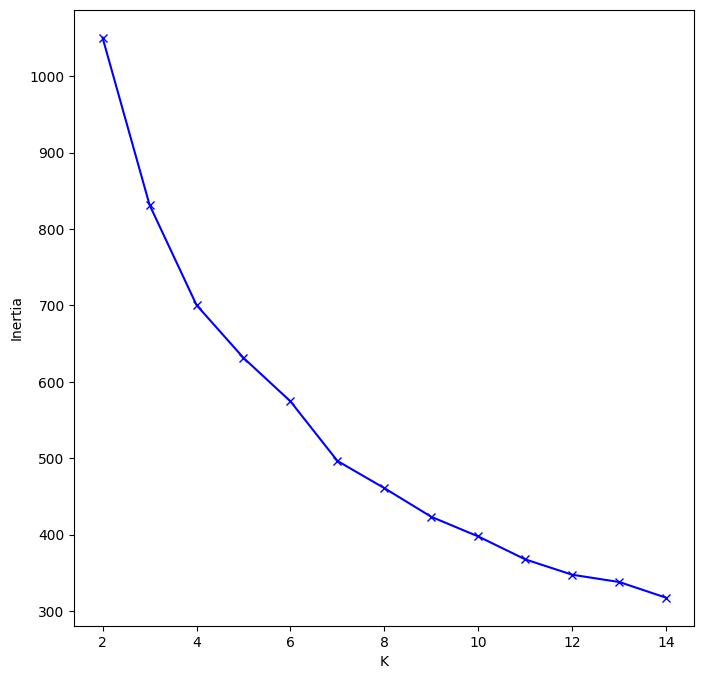

In [110]:
# Graficamos
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

# La gráfica arroja que el K óptimo del codo está entre 4 y 5

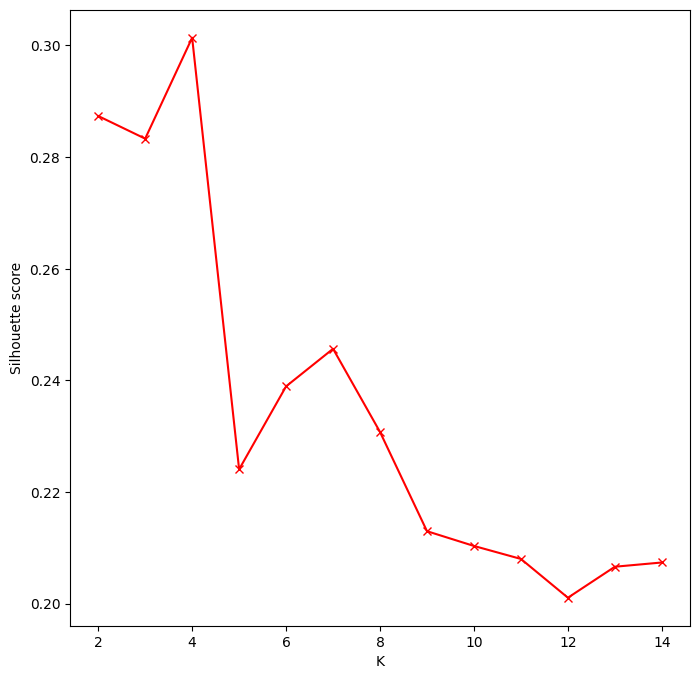

In [111]:
# confirmamos si K óptima está entre 4 y 5 con el coeficiente de silueta
plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

# La gráfica arroja que K =  5  es el K óptimo

In [113]:
km = KMeans(n_clusters= 5, n_init=10)  # aplicamos KMeans
y = km.fit_predict(df_country_scaled)  # hacemos predicción
print('Índice de silhouette = ', silhouette_score(df_country_scaled, y)) #imprimimos pca data standar contra predicciones y
df_country['k_means'] = y

# El resultado arroja que la reducción de dimensionalidad si está ayudando al algoritmo a obtener mejores resultados.

Índice de silhouette =  0.3064507657886972
